<a href="https://colab.research.google.com/github/buthaina279/DS_Capstone_NLP/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries

from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import nltk
from google.colab import drive  
#import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/datasets/new_datasets'

Mounted at /content/gdrive


In [14]:
airline = pd.read_csv("./gdrive/My Drive/datasets/new_datasets/airline.csv")

In [4]:
airline.sample(5)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text
427,0,1337163353953865728,2020-12-10 22:32:41,"['always', 'pleasure', 'given', 'rating', 'sta...",0,False,Austria,en,Turkish airlines,always pleasure given rating star global airli...
713,212,1336365232286031876,2020-12-08 17:41:14,"['dont', 'keep', 'silent', 'sexual', 'genderba...",0,False,Cdmx,en,Qatar airways,dont keep silent sexual genderbased violence q...
1591,40,1336388631389483009,2020-12-08 19:14:13,"['airfrance', 'travel', 'update', 'following',...",0,False,LYS LFLL,en,Air France,airfrance travel update following lockdown fra...
854,509,1334658199585239040,2020-12-04 00:38:06,"['japan', 'qatar', 'qatarairways', 'resume', '...",0,False,NaN,en,Qatar airways,japan qatar qatarairways resume flight tokyo h...
860,529,1334485034128957440,2020-12-03 13:10:00,"['safety', 'start', 'home', 'qatarairways', 't...",144,False,"Doha, Qatar",en,Qatar airways,safety start home qatarairways technical safet...


#Sentiment Analysis using TextBlob
TextBlob is a python library for Natural Language Processing (NLP).TextBlob actively used Natural Language ToolKit (NLTK) to achieve its tasks.

#Create a function to get the subjectivity

Opinions are usually subjective expressions that describe people’s sentiments, appraisals, or feelings toward entities, events, and their properties.

In [15]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity

Sentiment analysis is a method of identifying attitudes in text data about a subject of interest. It is scored using polarity values that range from 1 to -1. Values closer to 1 indicate more positivity, while values closer to -1 indicate more negativity.

In [16]:
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

In [17]:
# Create two new columns 'Subjectivity' & 'Polarity'
airline['subjectivity'] = airline['text'].apply(getSubjectivity)
airline['polarity'] = airline['text'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
airline.head(5)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text,subjectivity,polarity
0,0,1336979288470548481,2020-12-10 10:21:16,"['achieve', 'kingdom', 'vision', 'sustainabili...",0,False,"RIYADH,SAUDI ARABIA",en,Saudia airlines,achieve kingdom vision sustainability economic...,0.133333,0.116667
1,2,1336950027005161473,2020-12-10 08:25:00,"['achieve', 'kingdom', 'vision', 'sustainabili...",5,False,"Jeddah, Saudi Arabia",en,Saudia airlines,achieve kingdom vision sustainability economic...,0.133333,0.116667
2,540,1336909751532351489,2020-12-10 05:44:58,"['dmampget', 'mark', 'java', 'database', 'acco...",0,False,NaN,en,Saudia airlines,dmampget mark java database accounting finance...,0.000000,0.000000
3,541,1336827127824572422,2020-12-10 00:16:38,"['illdo', 'math', 'stat', 'marketing', 'accoun...",0,False,NaN,en,Saudia airlines,illdo math stat marketing accounting onlineexa...,0.000000,0.000000
4,542,1336826958764789762,2020-12-10 00:15:58,"['illdo', 'math', 'stat', 'marketing', 'accoun...",2,False,United States,en,Saudia airlines,illdo math stat marketing accounting onlineexa...,0.000000,0.000000


In [8]:
def getPolarityPlot(polarity, airline):
   fig, ax = plt.subplots(figsize=(8, 6))

   # Plot histogram of the polarity values
   polarity.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
                 ax=ax,
                 color="purple")

   plt.title("Sentiments from Tweets on " +airline)
   plt.show()

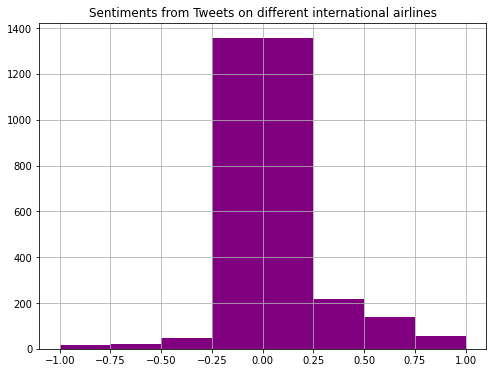

In [18]:
getPolarityPlot(airline['polarity'], "different international airlines")

It is clear that the majority of tweets have positive santiment(>0).

#Classify the tweets based on polarity value 

In [9]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [19]:
airline['sentiment'] = airline['polarity'].apply(getSentiment)

In [11]:
airline.sample(5)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text,subjectivity,polarity,sentiment
52,618,1334116325396869122,2020-12-02 12:44:53,"['interior', 'ministry', 'saudi', 'arabia', 's...",0,False,NaN,en,Saudia airlines,interior ministry saudi arabia said tuesday la...,0.00,0.00,Neutral
76,16,1337068797237342210,2020-12-10 16:16:57,"['thank', 'refund', 'unitedairlines', 'help']",0,False,Venezuela,en,United Airlines,thank refund unitedairlines help,0.00,0.00,Neutral
867,538,1334429780049940481,2020-12-03 09:30:26,"['qatarairways', 'flight', 'sydney', 'qatar', ...",0,False,"Cairo, Egypt",en,Qatar airways,qatarairways flight sydney qatar didnt reach w...,0.00,0.00,Neutral
1728,70,1336452110418927619,2020-12-08 23:26:27,"['spent', 'billion', 'dollar', 'canada', 'loos...",1,False,"Cape Breton, Nova Scotia",en,Air Canada,spent billion dollar canada loosing important ...,0.55,0.15,Positive
443,90,1336618773072277504,2020-12-09 10:28:43,"['ready', 'transport', 'covid', 'vaccine', 'tu...",0,False,"CA, USA",en,Turkish airlines,ready transport covid vaccine turkish cargo ca...,0.25,0.10,Positive


# visualizing the seniment

In [11]:
color_list = ['#bdbdbd',
              '#1a9850',
              '#d73027']

In [12]:
# Data balance
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True,colors = color_list, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

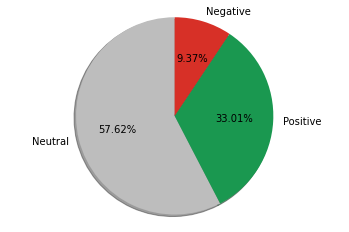

In [13]:
createPieChartFor(airline.sentiment)

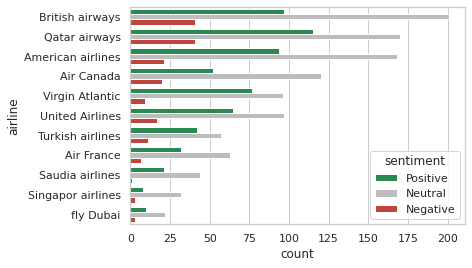

In [14]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="airline",hue = "sentiment", data=airline,  palette= ['#1a9850','#bdbdbd','#d73027'],  order = airline['airline'].value_counts().index)

Since the **netural sentiment** does **not** add any **informative** data, we are going to **drop** it. 

In [22]:
#filter only pos and neg 
airline = airline[(airline.sentiment == "Positive") | (airline.sentiment == "Negative")]
airline.sample(5)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text,subjectivity,polarity,sentiment
398,316,1334495530840449026,2020-12-03 13:51:42,"['respectful', 'final', 'taxy', 'manchester', ...",175,False,"Manchester, England",en,Virgin Atlantic,respectful final taxy manchester gvxlg ruby tu...,0.85,0.250000,Positive
1259,532,1333972254770786306,2020-12-02 03:12:24,"['oneworld', 'named', 'best', 'airline', 'alli...",4,False,"Nairobi, Kenya",en,British airways,oneworld named best airline alliance sixth con...,0.30,1.000000,Positive
568,34,1334737122641764352,2020-12-04 05:51:42,"['consumer', 'flight', 'booking', 'cancelled',...",0,False,NaN,en,Singapor airlines,consumer flight booking cancelled airline covi...,0.20,-0.300000,Negative
1600,57,1335997095107579904,2020-12-07 17:18:23,"['great', 'airline', 'shot', 'airbus', 'airfra...",0,False,NaN,en,Air France,great airline shot airbus airfrance france stu...,0.75,0.800000,Positive
1485,270,1334522136577396736,2020-12-03 15:37:26,"['never', 'ever', 'ever', 'changed', 'flight',...",0,False,Haiti,en,American airlines,never ever ever changed flight impossible flig...,1.00,-0.666667,Negative


# Printing positive tweets 

**Note:** run this before the filter

In [20]:
print('Printing positive tweets:\n')
j=1
sortedDF = airline.sort_values(by=['polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['text'][i])
    print()
    j= j+1


Printing positive tweets:

1) ['achieve', 'kingdom', 'vision', 'sustainability', 'economic', 'power', 'social', 'development', 'knowledge', 'transfer']

2) ['achieve', 'kingdom', 'vision', 'sustainability', 'economic', 'power', 'social', 'development', 'knowledge', 'transfer', 'aviation', 'industry', 'saei', 'saudiairlines', 'company', 'signed', 'memorandum', 'understanding', 'agreement', 'technics']

3) ['happy', 'anniversary', 'best', 'airline', 'ever', 'always', 'saudia']

4) ['realflow', 'allinone', 'software', 'start', 'grow', 'real', 'estate', 'investing', 'business', 'video', 'link']

5) ['airline', 'great', 'taste', 'travel', 'soft', 'feeling', 'friendly', 'crew', 'always', 'enjoyed', 'frequent']

6) ['saudi', 'arabia', 'saudi', 'prince', 'strongly', 'criticizes', 'israel', 'bahrain', 'summit', 'although', 'prince', 'hold', 'offi']

7) ['saudia', 'covid', 'rule', 'eygpt', 'different', 'airline', 'others', 'rightly', 'allow', 'passenger']

8) ['realflow', 'allinone', 'software',

# Printing negative tweets 

**Note:** run this before the filter

In [21]:
 
print('Printing negative tweets:\n')
j=1
sortedDF = airline.sort_values(by=['polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['text'][i])
    print()
    j=j+1

Printing negative tweets:

1) ['iran', 'foreign', 'minister', 'zarif', 'desperate', 'blame', 'kingdom', 'saudiarabia', 'anything', 'negative', 'happens']

2) ['unitedairlines', 'green']

3) ['toilet', 'plume', 'dirty', 'secret', 'airline', 'dont', 'address', 'happy', 'talk', 'cleaning', 'mask', 'middle', 'seat']

4) ['unitedairlines', 'green', 'carbon', 'capture']

5) ['correction', 'support', 'active', 'duty', 'member', 'veteran', 'dont', 'recognize', 'reserve', 'national']

6) ['worst', 'airline', 'everattendants', 'unprofessionalnever', 'worstairlinesunited']

7) ['article', 'little', 'anything', 'united', 'airline', 'continues', 'worse']

8) ['sitting', 'united', 'airline', 'flight', 'safety', 'however', 'front', 'plane', 'empty']

9) ['hate', 'unitedairlines']

10) ['fashion', 'unitedairlines', 'common', 'retweet']

11) ['sitting', 'united', 'airline', 'flight', 'safety', 'however', 'front', 'plane', 'empty']

12) ['plane', 'back', 'crib', 'flight', 'attendant', 'exhausted', 'expl

#Get the positive reason

In [ ]:
#test
text_list = ['changi', 'ready', 'vaccine', 'distribution', 'asia', 'singapore', 'cargo', 'gear', 'safe', 'transportation']
for i in text_list:
    # Not sure what is in common_words, but it needs to be a string
    polarity = TextBlob(i).sentiment.polarity
    if polarity != 0:
      print(i,polarity)


ready 0.2
safe 0.5


#Get the words for positive and negative sentiment

In [53]:
#transform from "str" to list
airline["text"] = airline["text"].apply(eval)

In [54]:
#make sure that text column is list
#for i, l in enumerate(airline["test1"]):
#    print("list",i,"is",type(l))

In [69]:
airline['reason']= ''
for index, airline_list in enumerate(airline['text']):
  reasons_list = []
  for word in airline_list:
    polarity = TextBlob(word).sentiment.polarity
    if polarity != 0:
      reasons_list.append(word)
    airline['reason'][index]= reasons_list

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
airline.sample(10)

,Unnamed: 0,tweet_id,created_at,text,likes,retweeted,location,language,airline,string_text,subjectivity,polarity,sentiment,reason
719,238,1336324398236594179,2020-12-08 14:58:58,"[qatar, airway, announces, flight, seattle, fr...",2,False,"Phoenix, AZ",en,Qatar airways,qatar airway announces flight seattle frequent...,0.300000,0.100000,Positive,[experienced]
417,381,1334068861608620032,2020-12-02 09:36:17,"[still, refund, absolute, joke, company]",1,False,"Water Orton, England",en,Virgin Atlantic,still refund absolute joke company,0.900000,0.200000,Positive,"[free, center]"
127,69,1336369182762541062,2020-12-08 17:56:56,"[worst, airline, everattendants, unprofessiona...",0,False,"Norfolk, VA",en,United Airlines,worst airline everattendants unprofessionalnev...,1.000000,-1.000000,Negative,[live]
1826,210,1334815791926173697,2020-12-04 11:04:19,"[first, year, yesterday, aircanada, must, eith...",0,False,"Montréal, Canada",en,Air Canada,first year yesterday aircanada must either tes...,0.333333,0.250000,Positive,
526,341,1334039213885546504,2020-12-02 07:38:28,"[wrong, turkishairlines, asked, time, partial,...",2,False,NaN,en,Turkish airlines,wrong turkishairlines asked time partial refun...,0.600000,-0.300000,Negative,[sorry]
1233,503,1334399675479322624,2020-12-03 07:30:49,"[throwback, lucky, visit, destination, week, n...",2,False,"England, United Kingdom",en,British airways,throwback lucky visit destination week norw,0.833333,0.333333,Positive,
1608,78,1335724207821434880,2020-12-06 23:14:02,"[great, airline, shot, airbus, airfrance, fran...",2,False,Pa,en,Air France,great airline shot airbus airfrance france stu...,0.750000,0.800000,Positive,
113,53,1336449950327005205,2020-12-08 23:17:52,"[unitedairlines, taking, delivery, first, boei...",0,False,Utah,en,United Airlines,unitedairlines taking delivery first boeingmax...,0.200000,0.125000,Positive,[wonderful]
1015,112,1336350633348263936,2020-12-08 16:43:13,"[remember, britishairways, dropped, unionjack,...",3,False,Ireland,en,British airways,remember britishairways dropped unionjack repa...,0.562500,-0.250000,Negative,
1673,9,1337087150718939140,2020-12-10 17:29:53,"[interior, politician, voice, disappointment, ...",0,False,Kelowna,en,Air Canada,interior politician voice disappointment canad...,0.400000,-0.600000,Negative,


#See the most 15 frequent words for sentiment classification

In [ ]:
#you have to remove na values first
#airline['reason'] = airline['reason'].apply(eval)

In [71]:
airline.isna().sum()

Unnamed: 0        0
tweet_id          0
created_at        0
text              0
likes             0
retweeted         0
location        192
language          0
airline           0
string_text       0
subjectivity      0
polarity          0
sentiment         0
reason            0
dtype: int64

In [61]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

Text(0.5, 1.0, 'Reasons')

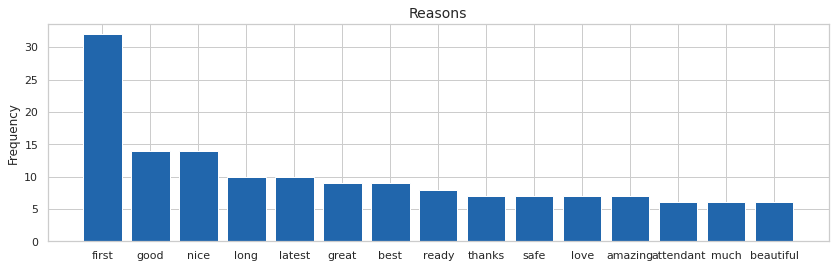

In [63]:
one_color = ['#2166ac']
n = 15
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(airline['reason']).value_counts()[:n].index, 
       to_1D(airline['reason']).value_counts()[:n].values, color = one_color)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Reasons", size = 14)

#Save the data set

In [64]:
airline.to_csv('airline_classified.csv')
!cp airline_classified.csv "./gdrive/My Drive/datasets/new_datasets/"